<a href="https://colab.research.google.com/github/assiou349/DS_Case-Study/blob/main/visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

In [ ]:
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500, 6), 0)

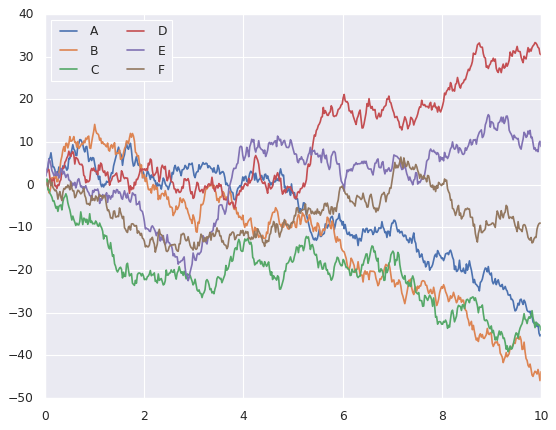

In [ ]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [12]:
import seaborn as sns
sns.set()

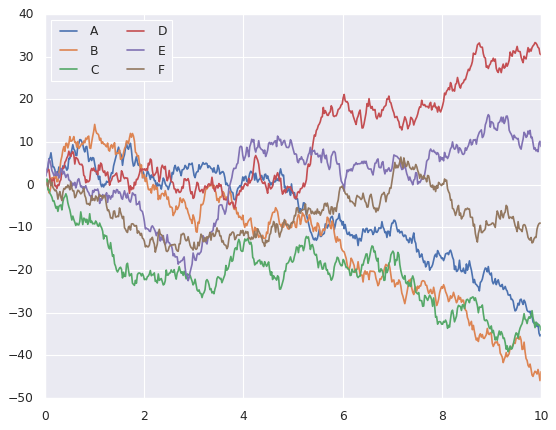

In [ ]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

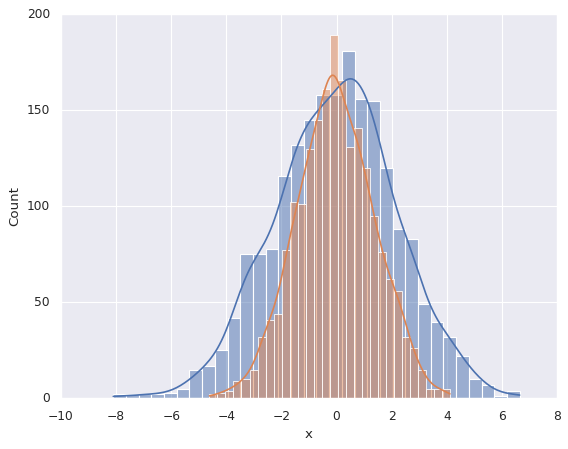

In [ ]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
  sns.histplot(data[col], kde=True)

/tmp/ipython-input-3313311836.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
/tmp/ipython-input-3313311836.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


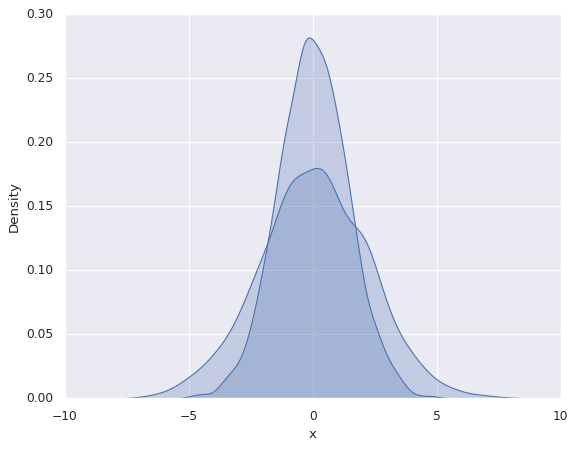

In [ ]:
from numpy._core.fromnumeric import shape
for col in 'xy':
  sns.kdeplot(data[col], shade=True)

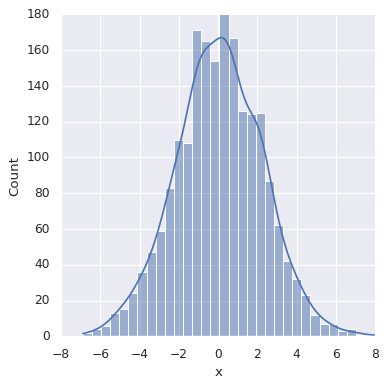

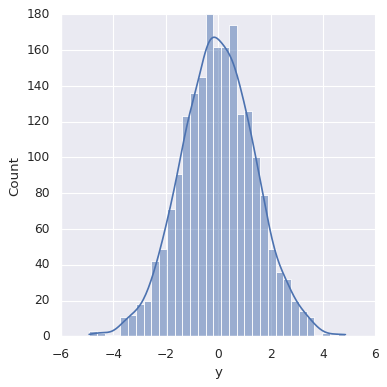

In [ ]:
sns.displot(data['x'], kde=True)
sns.displot(data['y'], kde=True)

<Axes: ylabel='Density'>

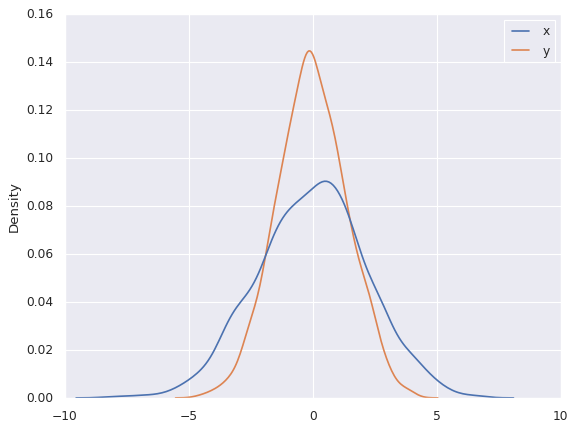

In [ ]:
sns.kdeplot(data)

In [ ]:
data

,x,y
0,-1.762108,0.624630
1,4.533351,2.267453
2,4.114487,1.919124
3,-1.955773,-0.729572
4,-3.267008,-0.227979
...,...,...
1995,-3.534769,-0.501760
1996,-3.624191,-2.443186
1997,0.341861,1.344812
1998,0.456371,-0.926975


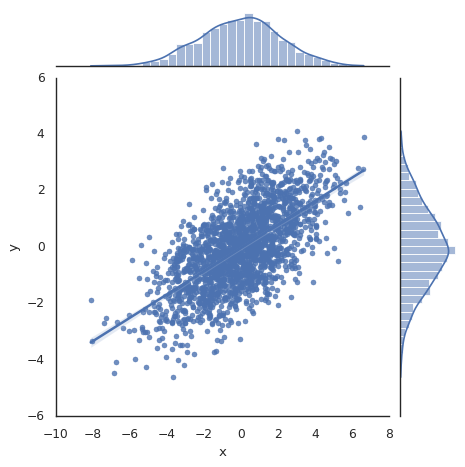

In [ ]:
with sns.axes_style('white'):
  sns.jointplot(x='x',y='y',data=data, kind='reg')

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


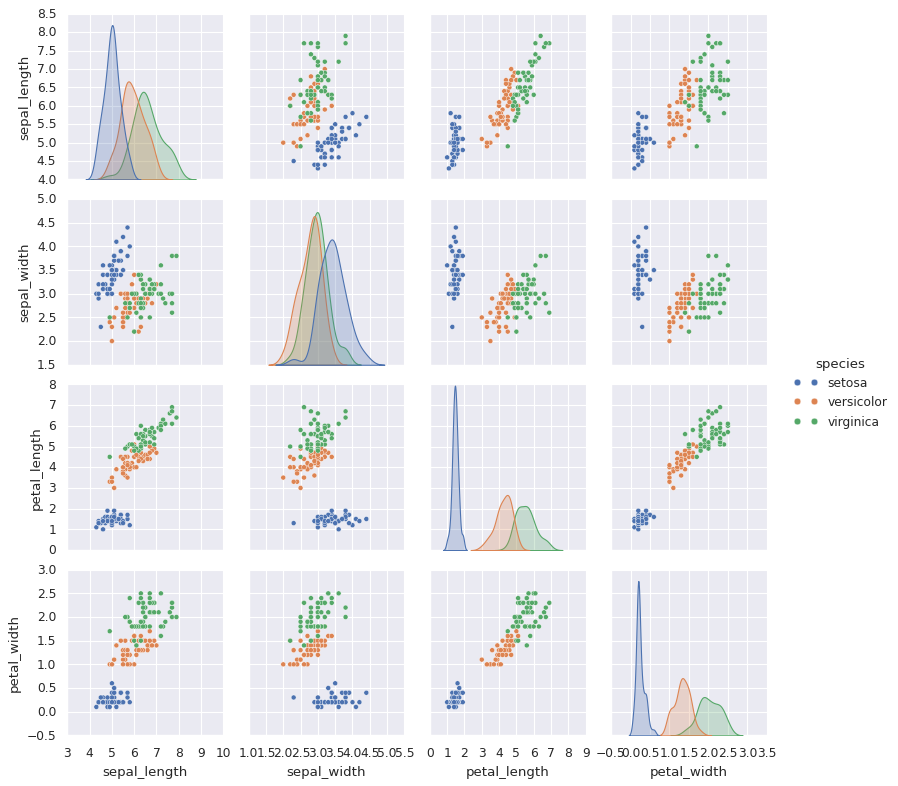

In [ ]:
sns.pairplot(iris, hue='species', size=2.5)

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

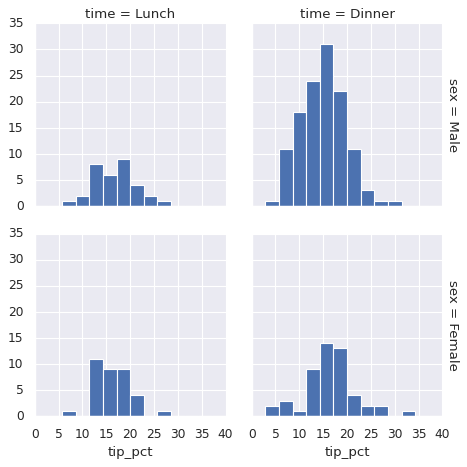

In [ ]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins = np.linspace(0, 40, 15))

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  2080k      0 --:--:-- --:--:-- --:--:-- 2086k


In [ ]:
data = pd.read_csv('marathon-data.csv')


In [ ]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [ ]:
data.dtypes

,0
age,int64
gender,object
split,object
final,object


In [ ]:
def convert_time(s):
  h, m, s = map(int, s.split(':'))
  return pd.Timedelta(hours=h, minutes=m, seconds=s)

In [ ]:
data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})

In [ ]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
data.dtypes

,0
age,int64
gender,object
split,timedelta64[ns]
final,timedelta64[ns]


In [ ]:
data['split_sec'] = data['split'].astype(int) /1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


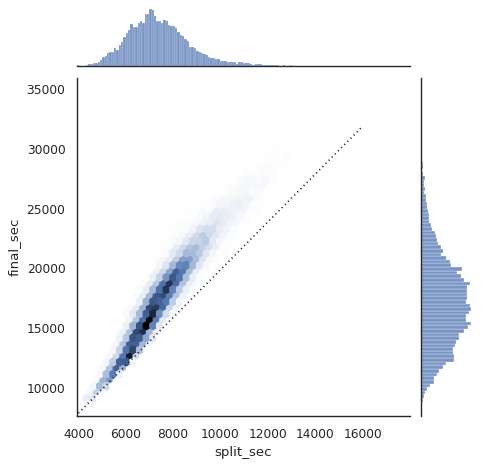

In [ ]:
with sns.axes_style('white'):
  g = sns.jointplot(x = 'split_sec', y = 'final_sec', data=data, kind='hex')
  g.ax_joint.plot(np.linspace(4000,16000), np.linspace(8000, 32000), ':k')

In [ ]:
data['split_frac'] = 1 -2 * data['split_sec'] / data['final_sec']

In [ ]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


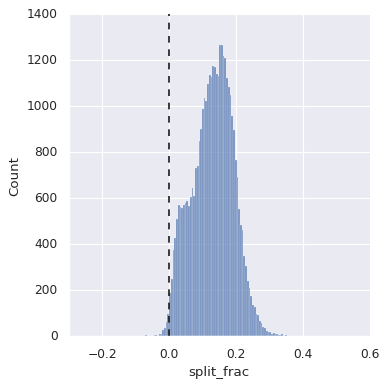

In [ ]:
from matplotlib.lines import lineStyles
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle='--')

In [ ]:
sum(data.split_frac<0)

251

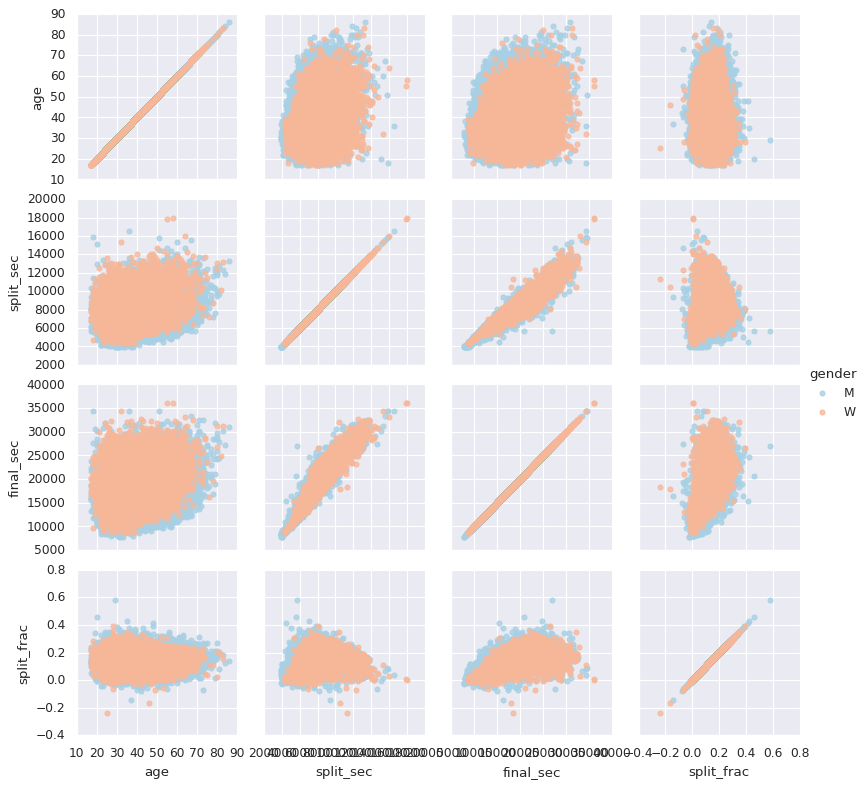

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

<Axes: xlabel='split_frac', ylabel='Density'>

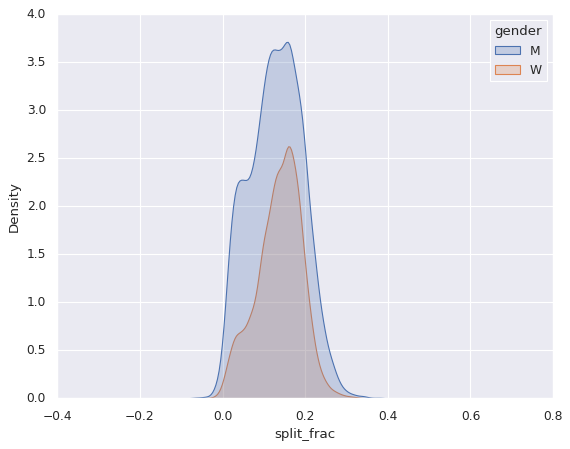

In [ ]:
sns.kdeplot(data=data, x='split_frac', hue='gender', fill=True)

/tmp/ipython-input-4069500608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x="gender", y="split_frac", palette=["lightblue", "lightpink"])


<Axes: xlabel='gender', ylabel='split_frac'>

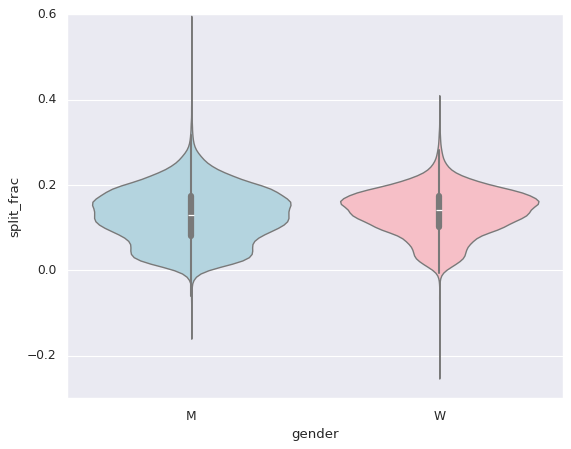

In [ ]:
sns.violinplot(data=data, x="gender", y="split_frac", palette=["lightblue", "lightpink"])

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age //10))

In [ ]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


In [ ]:
(data['age'] > 80).sum()

np.int64(7)

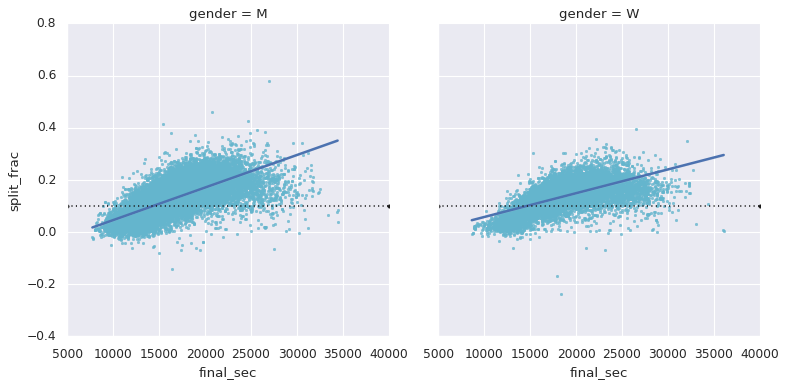

In [ ]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")

In [4]:
from google.colab import drive
%matplotlib inline


In [5]:
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [6]:
df = pd.read_csv('/content/mydrive/MyDrive/MIT_IDSS/WEEK_1/Automobile.csv')

In [7]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [9]:
df.shape

(201, 26)

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,201.0,NaN,NaN,NaN,0.840796,1.254802,-2.0,0.0,1.0,2.0,3.0
normalized_losses,201.0,NaN,NaN,NaN,125.189055,33.572966,65.0,101.0,122.0,150.0,256.0
make,201,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,201,2,gas,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,201,2,std,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_doors,201,2,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_style,201,5,sedan,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive_wheels,201,3,fwd,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_location,201,2,front,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel_base,201.0,NaN,NaN,NaN,98.797015,6.066366,86.6,94.5,97.0,102.4,120.9


<Axes: xlabel='price', ylabel='Count'>

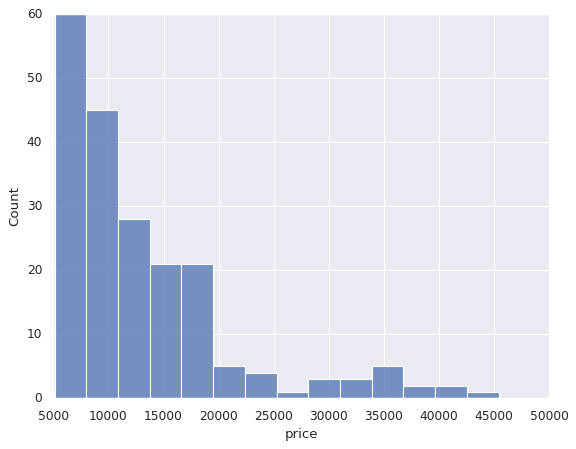

In [13]:
sns.histplot(data=df, x='price')

<Axes: title={'center': 'Histogram:Price'}, xlabel='Price of cars', ylabel='Frequency'>

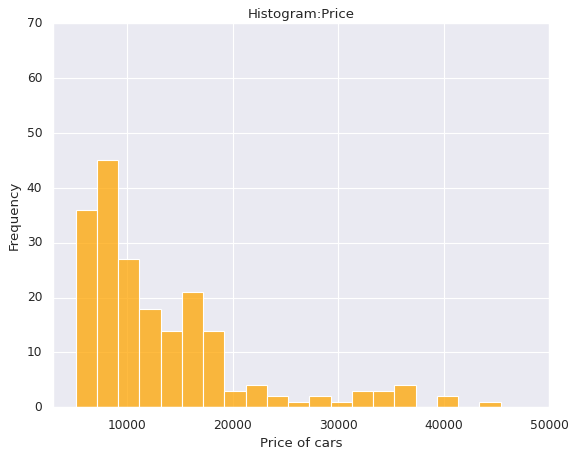

In [18]:
plt.title("Histogram:Price")
plt.xlim(3000, 50000)
plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x ='price', color='orange', bins=20)

<Axes: xlabel='price', ylabel='Count'>

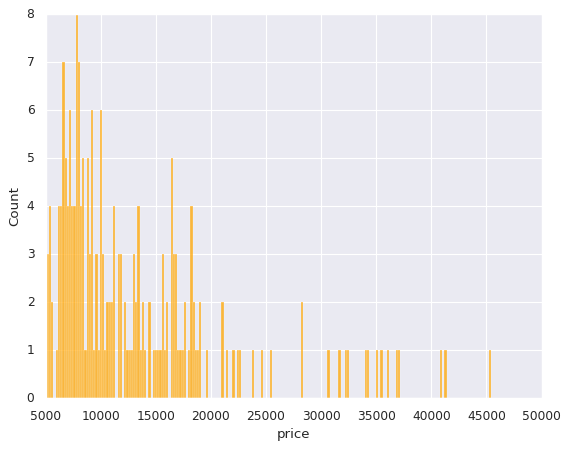

In [22]:

sns.histplot(data=df, x ='price', color='orange', binwidth=200)

<Axes: xlabel='price', ylabel='Count'>

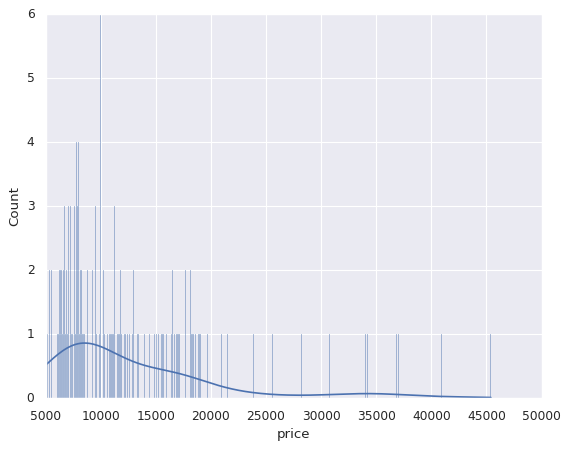

In [24]:
sns.histplot(data=df, x ='price', bins=700, kde=True)

<Axes: xlabel='price', ylabel='Count'>

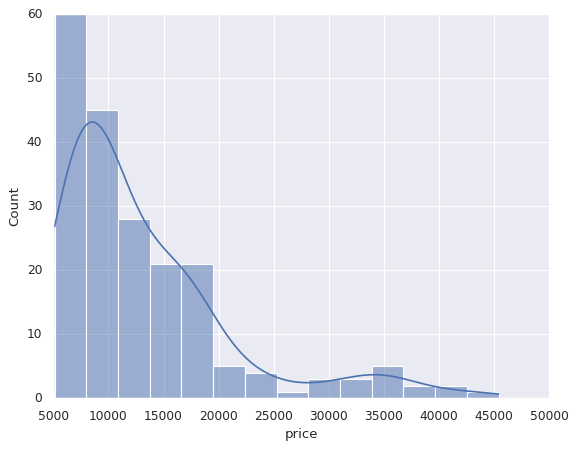

In [25]:
sns.histplot(data=df, x='price', kde=True)

<Axes: xlabel='price', ylabel='Count'>

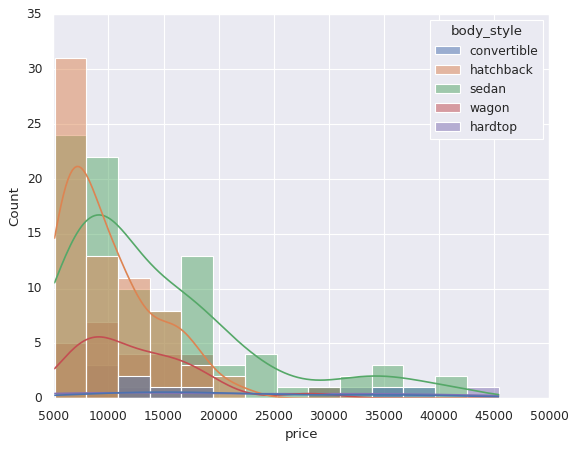

In [26]:
sns.histplot(data=df, x='price', hue='body_style', kde=True)

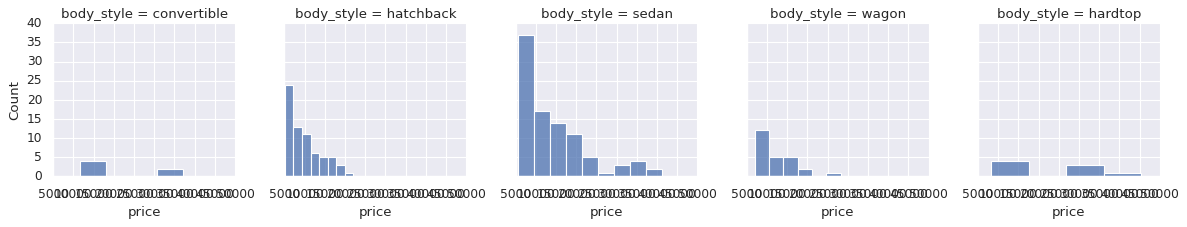

In [28]:
g = sns.FacetGrid(df, col="body_style")
g.map(sns.histplot, "price")

<Axes: xlabel='body_style', ylabel='price'>

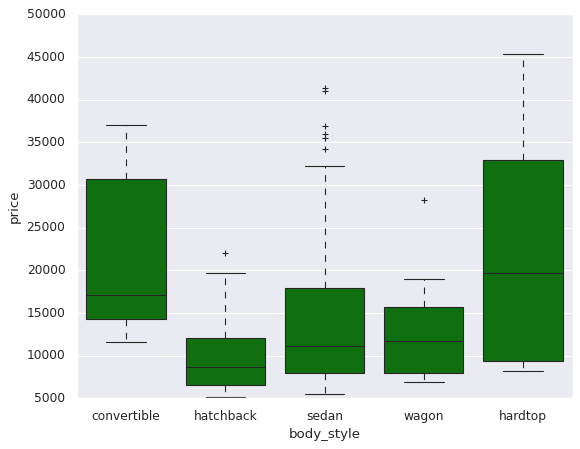

In [32]:
sns.boxplot(data=df, x='body_style', y='price', color='green')

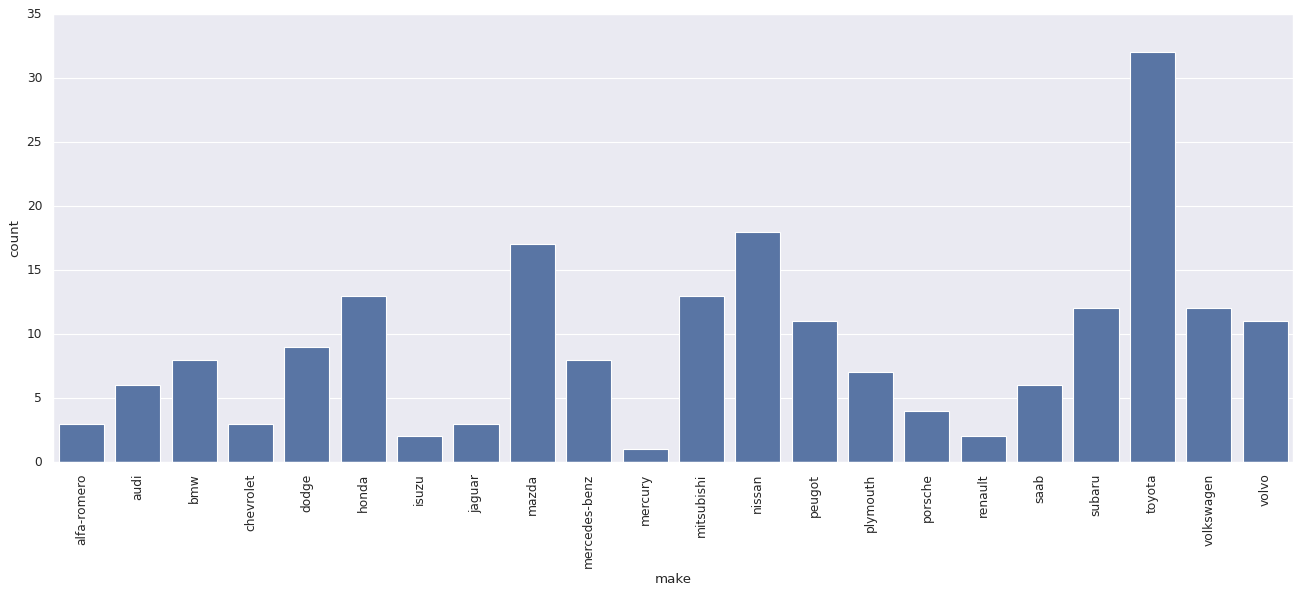

In [38]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='make')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='body_style', ylabel='count'>

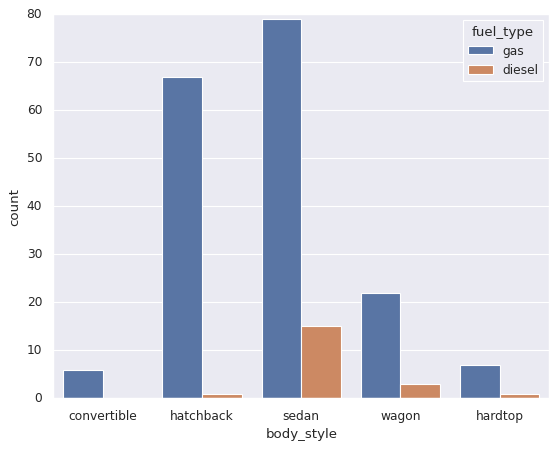

In [34]:
sns.countplot(data=df, x='body_style', hue='fuel_type')

In [39]:
flights = sns.load_dataset('flights')

<Axes: xlabel='month', ylabel='passengers'>

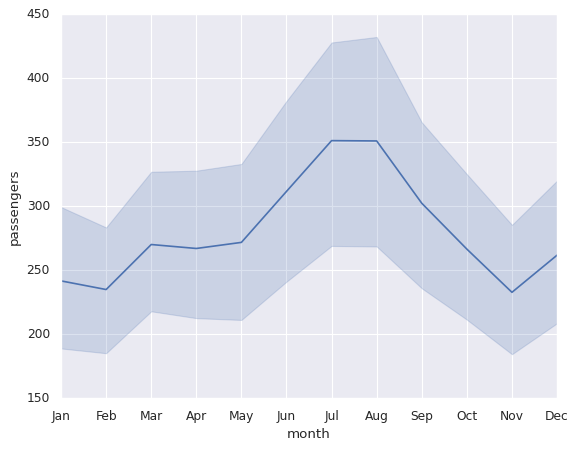

In [41]:
sns.lineplot(data = flights, x='month', y='passengers')

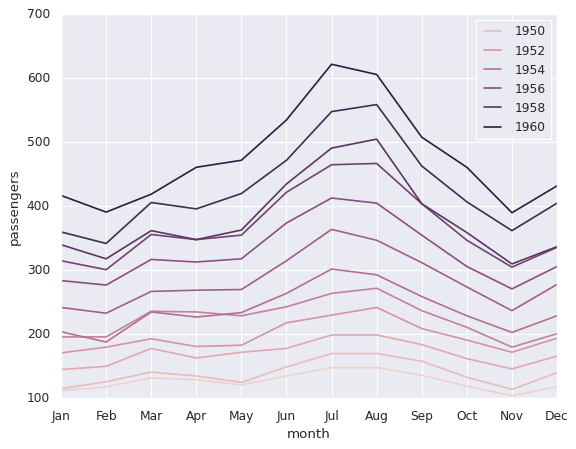

In [47]:
sns.lineplot(data=flights, x='month', y='passengers', errorbar=('ci', False), hue='year')
plt.legend(bbox_to_anchor=[1,1])

<Axes: xlabel='timepoint', ylabel='signal'>

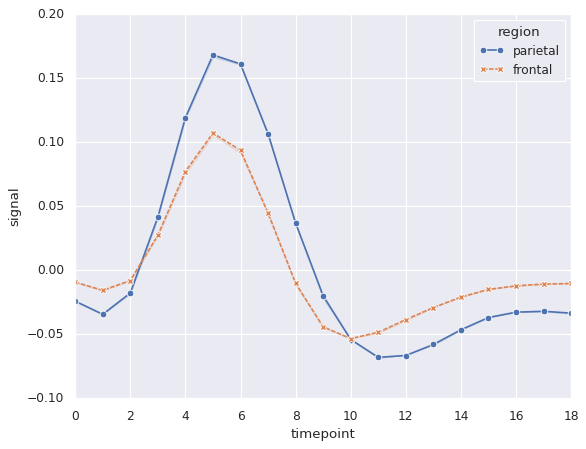

In [46]:
fmri = sns.load_dataset('fmri')
sns.lineplot(data=fmri, x='timepoint', y='signal', hue='region',style='region',  errorbar=('ci', False), markers=True)

<Axes: xlabel='engine_size', ylabel='horsepower'>

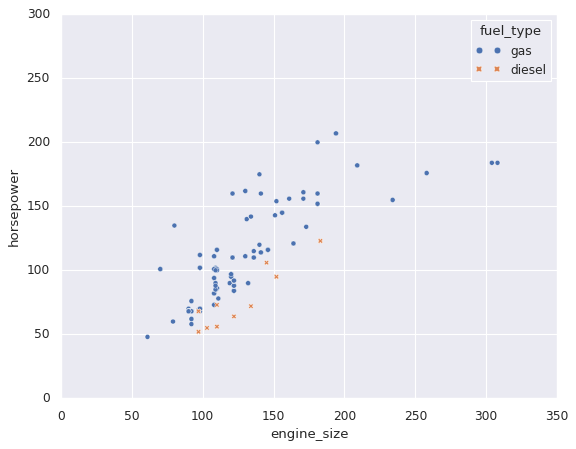

In [50]:
sns.scatterplot(data=df, x='engine_size', y='horsepower', hue='fuel_type', style='fuel_type')

<Axes: xlabel='bore', ylabel='stroke'>

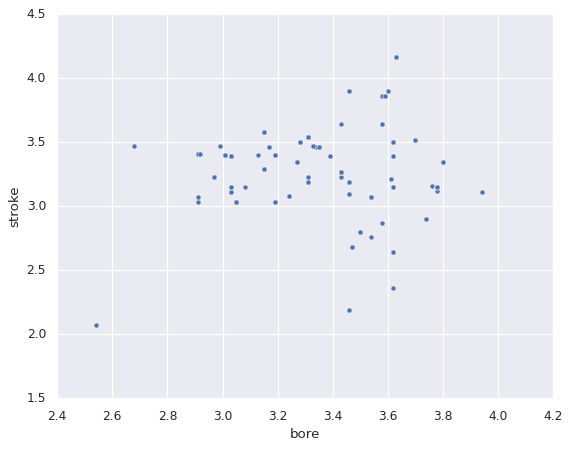

In [51]:
sns.scatterplot(data=df, x='bore', y='stroke')

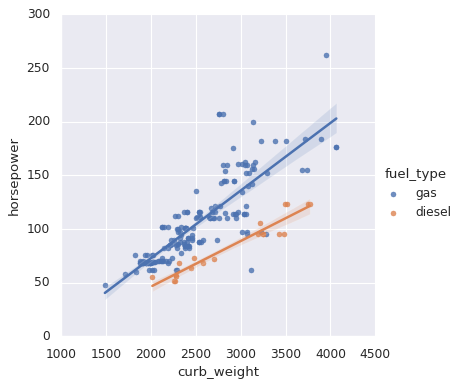

In [52]:
sns.lmplot(data=df, x='curb_weight', y='horsepower', hue='fuel_type')

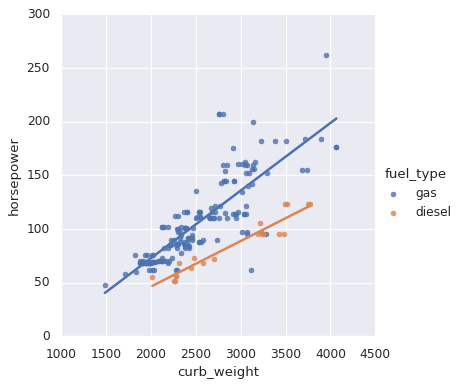

In [53]:
sns.lmplot(data=df, x='curb_weight', y='horsepower', hue='fuel_type', ci=False)

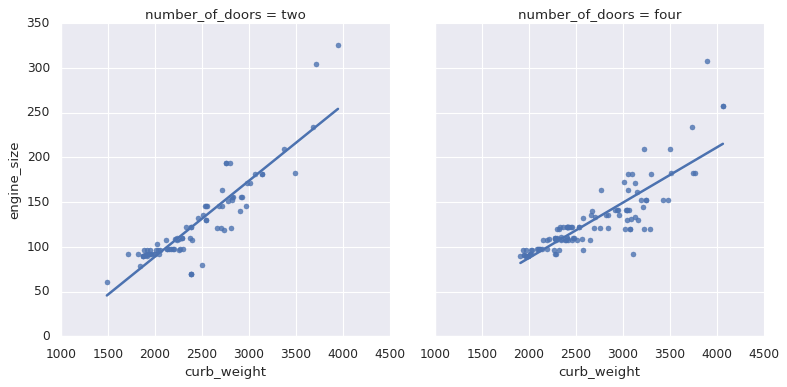

In [55]:
sns.lmplot(data=df, x='curb_weight', y='engine_size', col='number_of_doors', ci=False)

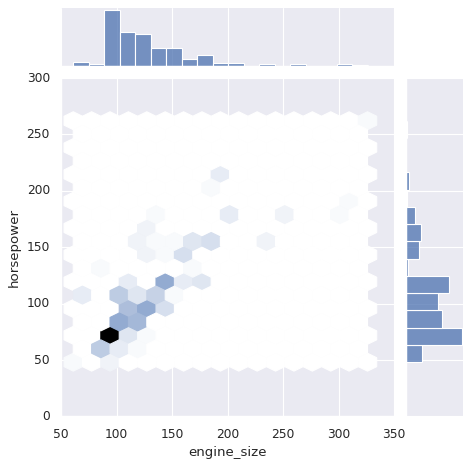

In [58]:
sns.jointplot(data=df, x='engine_size', y='horsepower', kind='hex')

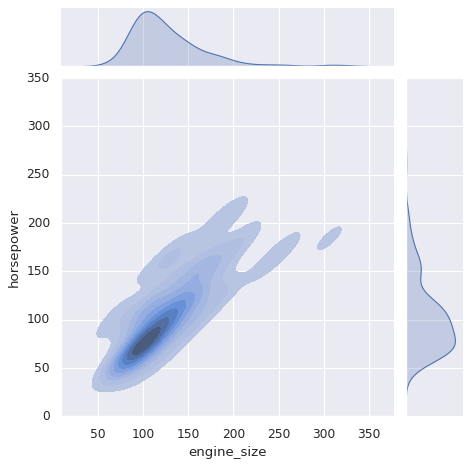

In [59]:
sns.jointplot(data=df, x='engine_size', y='horsepower', kind='kde', fill=True)

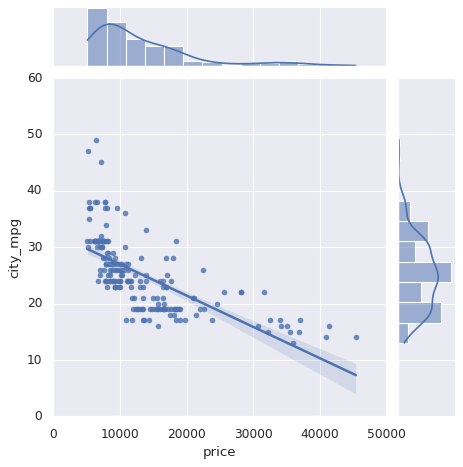

In [60]:
sns.jointplot(data=df, x='price', y='city_mpg', kind='reg')

/tmp/ipython-input-4087450840.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='fuel_type', y='horsepower', palette='bright',orient='v')


<Axes: xlabel='fuel_type', ylabel='horsepower'>

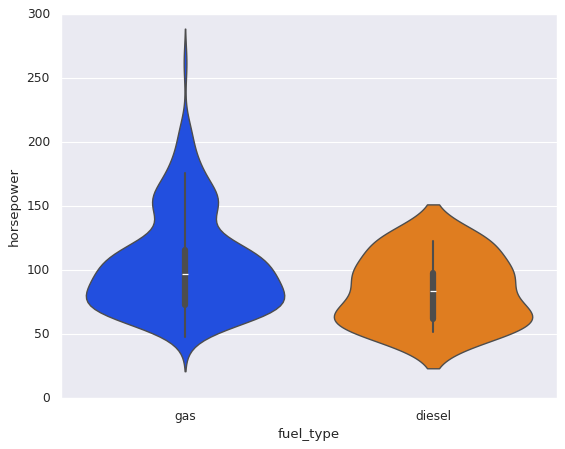

In [63]:
sns.violinplot(data=df, x='fuel_type', y='horsepower', palette='bright',orient='v')

<Axes: xlabel='body_style', ylabel='engine_size'>

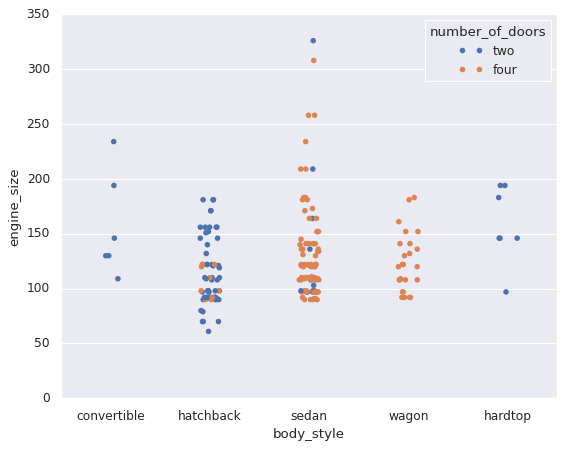

In [67]:
sns.stripplot(data=df, y='engine_size',x='body_style', hue='number_of_doors')

<Axes: xlabel='fuel_type', ylabel='engine_size'>

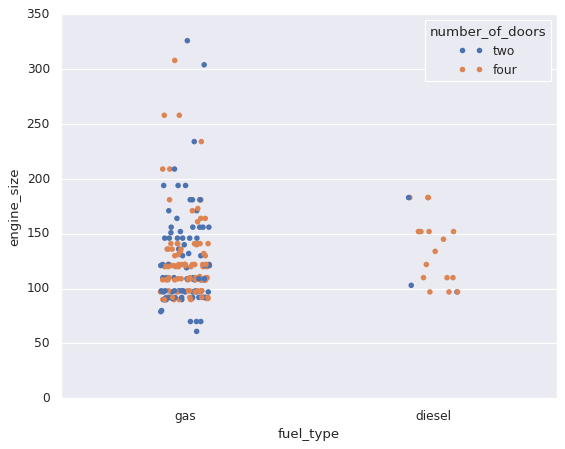

In [68]:
sns.stripplot(data=df, x='fuel_type', y='engine_size', hue='number_of_doors', jitter=True)

<Axes: xlabel='fuel_type', ylabel='engine_size'>

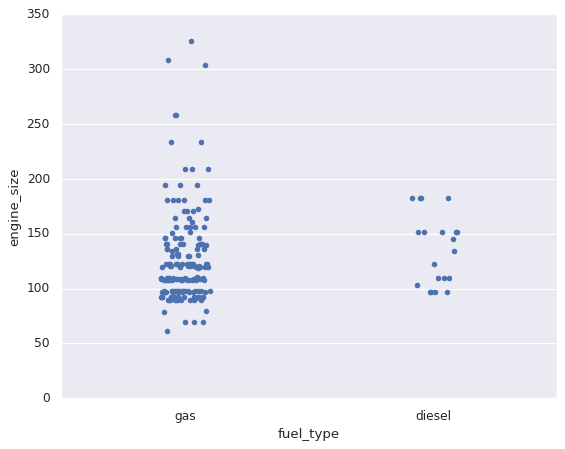

In [69]:
sns.stripplot(data=df, x='fuel_type', y='engine_size', jitter=True)

<Axes: xlabel='fuel_type', ylabel='price'>

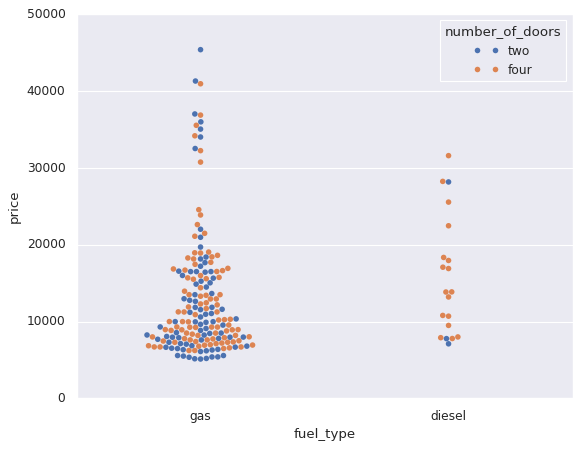

In [71]:
sns.swarmplot(data=df, x='fuel_type', y='price', hue='number_of_doors')

<Axes: xlabel='fuel_type', ylabel='price'>

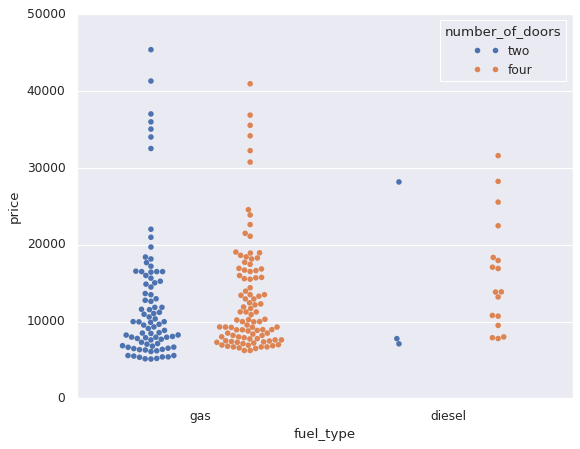

In [72]:
sns.swarmplot(data=df, x='fuel_type', y='price', hue='number_of_doors', dodge=True)

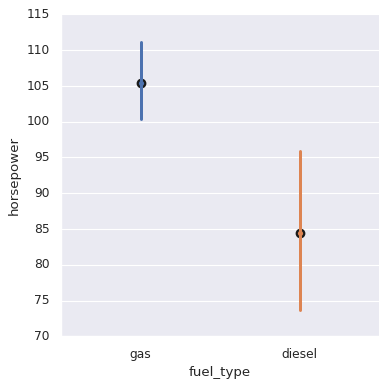

In [74]:
sns.catplot(data=df, x='fuel_type', y='horsepower', hue='fuel_type', kind='point')

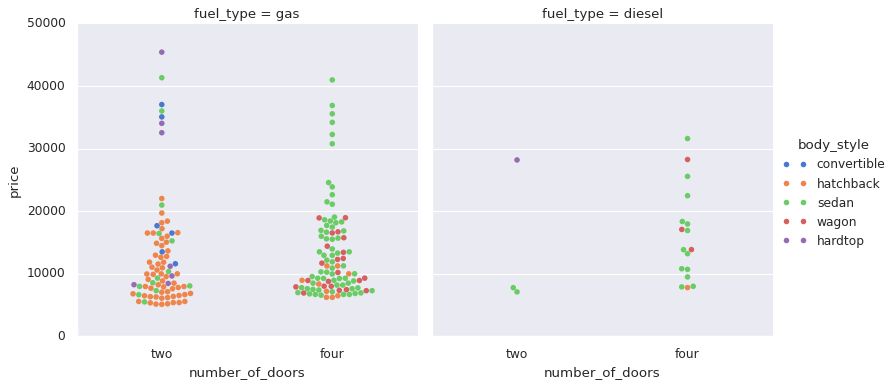

In [76]:
sns.catplot(data=df, x='number_of_doors', y='price', hue='body_style', col='fuel_type', kind='swarm', palette='muted')

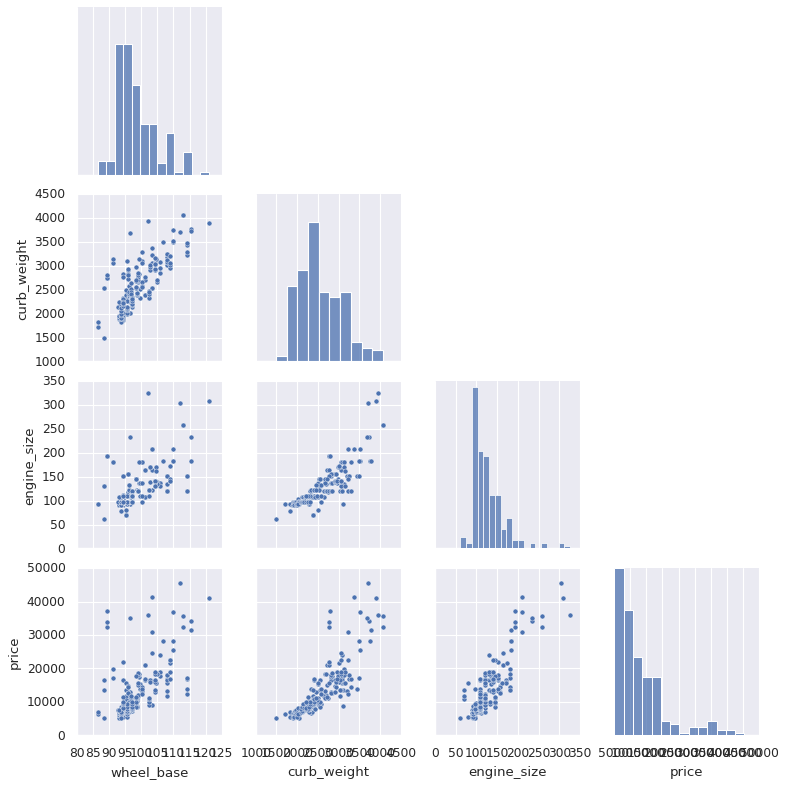

In [79]:
sns.pairplot(data=df,vars=['wheel_base', 'curb_weight', 'engine_size', 'price'], corner=True)

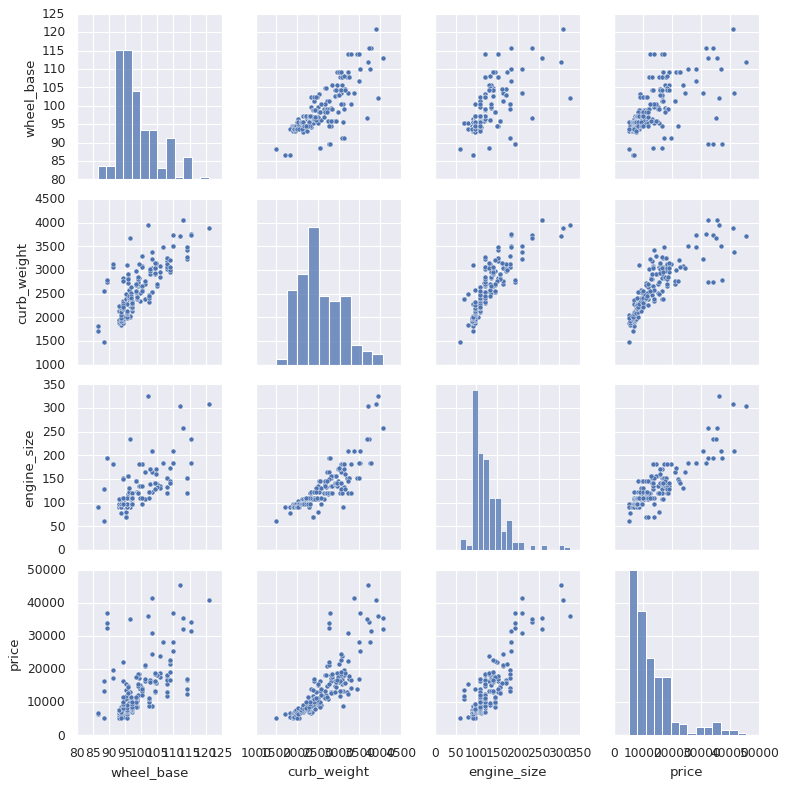

In [80]:
sns.pairplot(data=df,vars=['wheel_base', 'curb_weight', 'engine_size', 'price'])

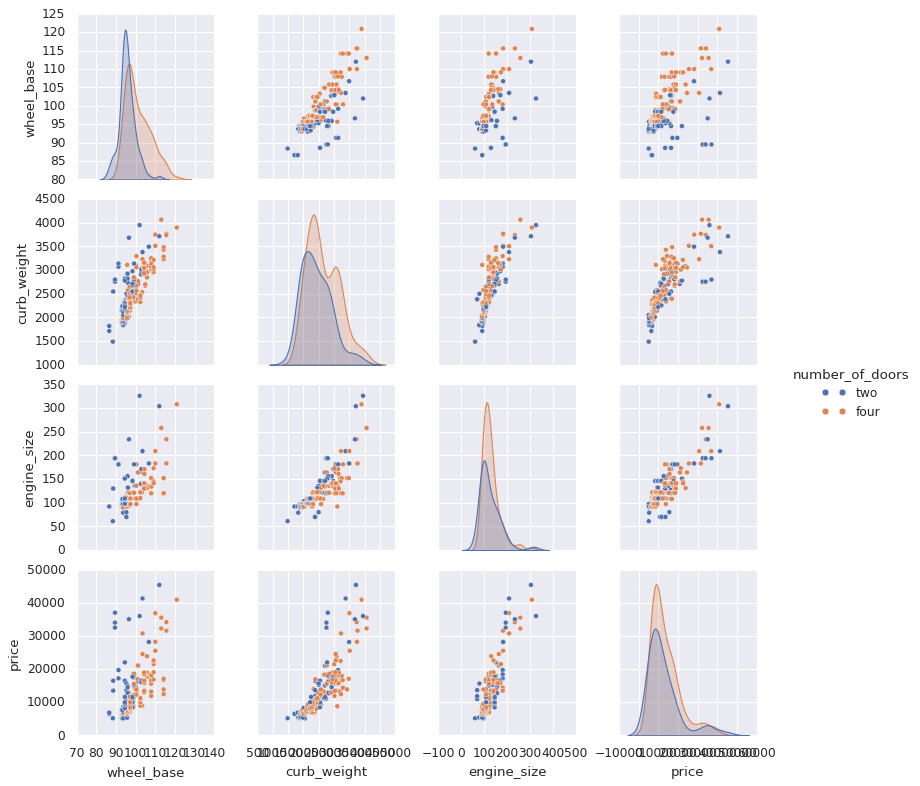

In [81]:
sns.pairplot(data=df,vars=['wheel_base', 'curb_weight', 'engine_size', 'price'], hue='number_of_doors')

<Axes: >

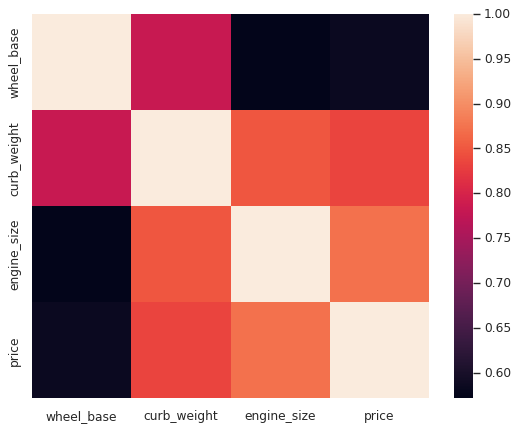

In [82]:
sns.heatmap(data=df[['wheel_base','curb_weight','engine_size','price']].corr())

<Axes: >

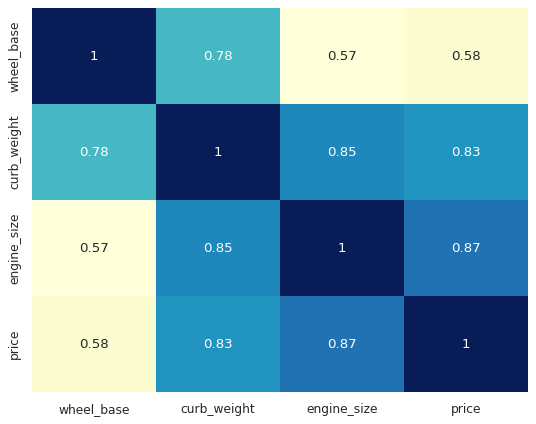

In [84]:
sns.heatmap(data=df[['wheel_base','curb_weight','engine_size','price']].corr(), annot=True, cbar=False, cmap='YlGnBu')

In [85]:
import plotly.express as px

In [86]:
his = px.histogram(df,x='price')

In [87]:
his.show()

In [88]:
fig_3m = px.scatter_3d(df, x='fuel_type', y='horsepower', z='price', color='horsepower')

In [89]:
fig_3m.show()

In [90]:
fig_3m.write_html("scater_3d.html")